In [ ]:
# cài đặt thư viện
!git clone https://github.com/khacluat03/predict-stock-market-using-machinglearning-deeplearning
!pip install vnstock

Cloning into 'predict-stock-market-using-machinglearning-deeplearning'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 22 (delta 7), reused 16 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.17 MiB | 4.20 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
from vnstock import *
import os
path = "stock-historical-data"
if not os.path.exists(path):
    os.makedirs(path)

# Danh sách mã chứng khoán
ticker = ["AGR", "BID", "CTG", "VCB"]

# Lặp qua các ticker và lấy dữ liệu
for i, tick in enumerate(ticker):
    try:
        print(f"{i} {tick}")

        # Lấy dữ liệu từ vnstock
        df_stock_historical_data = stock_historical_data(
            symbol=tick, start_date="2014-05-20", end_date="2024-05-20")

        # Tạo tên file CSV
        csv_file_name = f"stock-historical-data/{tick}-History.csv"

        # Lưu dữ liệu vào file CSV
        df_stock_historical_data.to_csv(csv_file_name, encoding="utf-8-sig")
    except:
        print("Crawling failed:", tick)

**Vui lòng chuyển đổi sang Vnstock3** thế hệ mới (3.1.0) với câu lệnh: `pip install vnstock3 --upgrade`.
**Từ 1/1/2025, vnstock3 sẽ được cài đặt khi sử dụng cú pháp** `pip install vnstock` **thay cho Vnstock Legacy** hiện tại.
Xem chi tiết [chuyển đổi sang vnstock3](https://vnstocks.com/docs/tai-lieu/migration-chuyen-doi-sang-vnstock3).
Phiên bản **Vnstock Legacy (0.2.9.2.3)** bạn đang sử dụng **sẽ không được nâng cấp thêm.**
Từ 7/10/2024 Vnstock giới thiệu nhóm Facebook Cộng đồng Vnstock, tham gia thảo luận tại đây: https://www.facebook.com/groups/vnstock.official

0 AGR
1 BID
2 CTG
3 VCB


In [ ]:
import pandas as pd
AGR = pd.read_csv('/content/predict-stock-market-using-machinglearning-deeplearning/stock-historical-data/AGR-History.csv')
BID = pd.read_csv('/content/predict-stock-market-using-machinglearning-deeplearning/stock-historical-data/BID-History.csv')
CTG = pd.read_csv('/content/predict-stock-market-using-machinglearning-deeplearning/stock-historical-data/CTG-History.csv')
VCB = pd.read_csv('/content/predict-stock-market-using-machinglearning-deeplearning/stock-historical-data/VCB-History.csv')

In [ ]:
bank_list = [AGR, BID, CTG, VCB]

# Xóa cột 'Unnamed: 0' và 'ticker'
for i in range(len(bank_list)):
    bank_list[i] = bank_list[i].drop(columns=['Unnamed: 0'])
    bank_list[i] = bank_list[i].drop(columns=['ticker'])
    #bank_list[i]['time'] = pd.to_datetime(bank_list[i]['time'])
    #bank_list[i].set_index('time',inplace=True)

AGR, BID, CTG, VCB = bank_list
bank_names = ['AGR', 'BID', 'CTG', 'VCB']

In [ ]:
AGR.describe()

,open,high,low,close,volume
count,2499.000000,2499.000000,2499.000000,2499.000000,2.499000e+03
mean,7399.108043,7547.693477,7245.290916,7392.571028,8.640396e+05
std,5406.692579,5520.229394,5279.374072,5394.502700,1.149999e+06
min,1900.000000,1990.000000,1900.000000,1910.000000,1.030000e+03
25%,3360.000000,3410.000000,3320.000000,3370.000000,1.228200e+05
50%,5220.000000,5360.000000,5180.000000,5250.000000,3.812800e+05
75%,10620.000000,10910.000000,10440.000000,10670.000000,1.166050e+06
max,26180.000000,27030.000000,25700.000000,26270.000000,1.108410e+07


In [ ]:
AGR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    2499 non-null   object
 1   open    2499 non-null   int64 
 2   high    2499 non-null   int64 
 3   low     2499 non-null   int64 
 4   close   2499 non-null   int64 
 5   volume  2499 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 117.3+ KB


In [ ]:
print(AGR.isnull().sum())

time      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [ ]:
AGR.shape

(2499, 6)

In [ ]:
df = AGR.copy()
df.set_index(df['time'],inplace=True)


In [ ]:
df

,time,open,high,low,close,volume
time,,,,,,
2014-05-20,2014-05-20,5570,6010,5480,6010,1689340
2014-05-21,2014-05-21,5930,6270,5830,6190,1915180
2014-05-22,2014-05-22,6100,6270,5830,5930,1927040
2014-05-23,2014-05-23,5930,6010,5740,5830,998300
2014-05-26,2014-05-26,5830,6190,5660,6190,1090710
...,...,...,...,...,...,...
2024-05-14,2024-05-14,19150,19250,18900,19050,959700
2024-05-15,2024-05-15,19150,20100,18950,19650,3146300
2024-05-16,2024-05-16,20000,20100,19600,19700,1646900


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = make_subplots(rows=5, cols=1,
                    subplot_titles=("Opening Price", "Closing Price", "Highest Price",
                                    "Lowest Price", "Volume"))
fig.add_trace(go.Scatter(x=df.index, y=df["open"]), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["close"]), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["high"]), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["low"]), row=4, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["volume"]), row=5, col=1)
fig.update_layout(showlegend=False, height=1200, width=800)
fig.show()

In [ ]:
import plotly.graph_objs as go

fig = go.Figure()

for df, bank in zip(bank_list, bank_names):
    fig.add_trace(go.Scatter(x=df.index, y=df['close'], mode='lines', name=bank))

fig.update_layout(
    title='Biểu Đồ Giá Đóng Cửa Cổ Phiếu Ngân Hàng Theo Thời Gian',
    xaxis_title='Thời gian',
    yaxis_title='Giá Đóng Cửa (VND)'
)

fig.show()


In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=4, cols=1, subplot_titles=bank_names, vertical_spacing=0.08, horizontal_spacing=0.05)

for i, (df, bank) in enumerate(zip(bank_list, bank_names)):
    row = i + 1
    fig.add_trace(go.Scatter(x=df.index, y=df['volume'], mode='lines', name=bank), row=row, col=1)

fig.update_layout(
    height=1600,
    width=1000,
    title_text="Biểu Đồ Khối Lượng Giao Dịch Cổ Phiếu Ngân Hàng Theo Thời Gian"
)

fig.show()

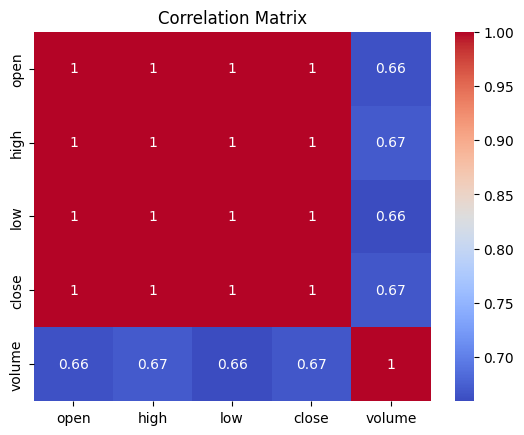

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = AGR[['open', 'high', 'low','close','volume']]
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
import numpy as np

def mean_squared_error_custom(y_true, y_pred):
    """
    Tính Mean Squared Error (MSE) dựa trên các giá trị thực tế và dự đoán.

    Parameters:
    y_true (array-like): Mảng chứa các giá trị thực tế.
    y_pred (array-like): Mảng chứa các giá trị dự đoán.

    Returns:
    float: Giá trị MSE.
    """
    return np.mean((y_true - y_pred)**2)

def r2_score_custom(y_true, y_pred):
    """
    Tính R-squared Score dựa trên các giá trị thực tế và dự đoán.

    Parameters:
    y_true (array-like): Mảng chứa các giá trị thực tế.
    y_pred (array-like): Mảng chứa các giá trị dự đoán.

    Returns:
    float: Giá trị R-squared Score.
    """
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

def mean_absolute_error_custom(y_true, y_pred):
    """
    Tính Mean Absolute Error (MAE) dựa trên các giá trị thực tế và dự đoán.

    Parameters:
    y_true (array-like): Mảng chứa các giá trị thực tế.
    y_pred (array-like): Mảng chứa các giá trị dự đoán.

    Returns:
    float: Giá trị MAE.
    """
    return np.mean(np.abs(y_true - y_pred))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
df = AGR.copy()
# copy dataframe để thực hiện phần khác mà không làm thay đổi dữ liệu gốc
df1 = df.copy()
df['time'] = pd.to_datetime(df['time'])
features = ['open', 'high', 'low', 'volume']
X = df[features]
y = df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
coefficients = model_lr.coef_
intercept = model_lr.intercept_

print("Hệ số Góc (Slopes):", coefficients)
print("Hệ số Chặn (Intercept):", intercept)


Hệ số Góc (Slopes): [-5.52579582e-01  7.83371233e-01  7.65116172e-01  2.02701317e-05]
Hệ số Chặn (Intercept): 6.828597615448416


In [ ]:
# Dự đoán giá với tập kiểm tra
y_pred = model_lr.predict(X_test)

# Đánh giá mô hình
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print(f'Mean Squared Error: {mse_lr}')
print(f'R^2 Score: {r2_lr}')
print("Mean Absolute Error (MAE):", mae_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)

Mean Squared Error: 17154.434378546877
R^2 Score: 0.9994200131315443
Mean Absolute Error (MAE): 83.17126686335422
Root Mean Squared Error (RMSE): 130.97493797878616


In [ ]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfr

,Actual,Predicted
53,6170,6228.526546
2391,16350,16088.390490
2310,15900,15745.269534
728,3240,3263.092647
850,5340,5329.606400
...,...,...
1810,13560,13470.732958
2330,18500,18753.153524
684,3590,3745.814608
1674,11380,11650.989859


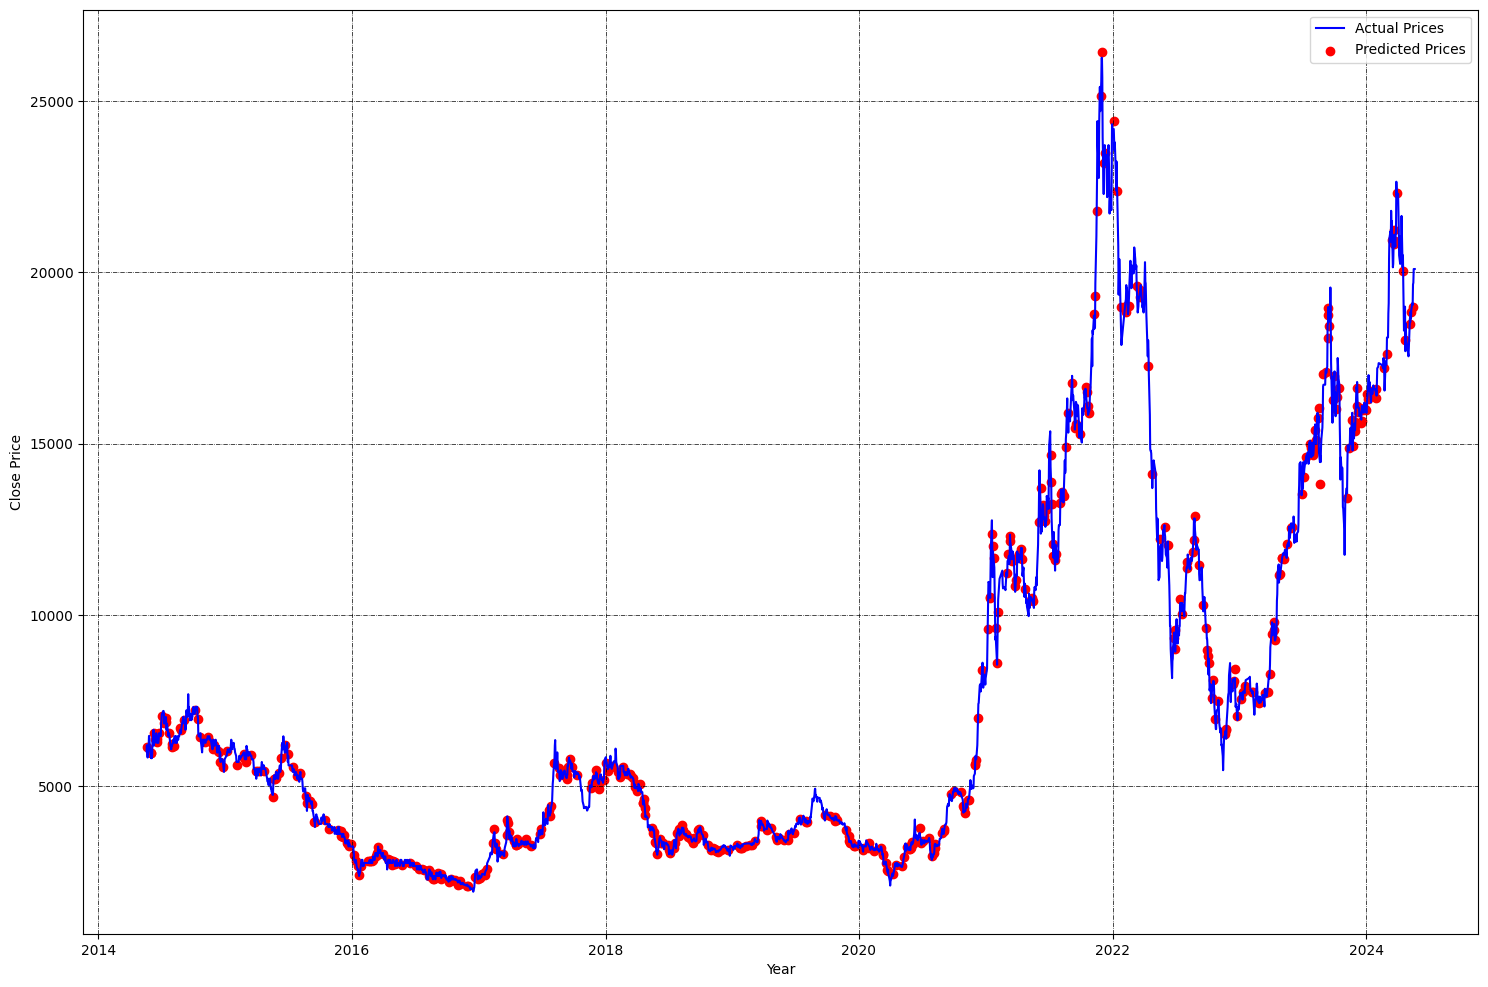

In [ ]:
# Vẽ biểu đồ so sánh giữa giá thực tế và giá dự đoán
plt.figure(figsize=(18, 12))
plt.plot(df['time'], df['close'], label='Actual Prices', color='blue')
plt.scatter(df['time'].iloc[X_test.index], y_pred,
            color='red', label='Predicted Prices')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
for i in range(1,6):
    df[f'next_{i}_day'] = df['time'] + pd.Timedelta(days=i)

In [ ]:
# Tạo các giá trị mới cho 5 ngày tiếp theo
last_known_values = df1.iloc[-1][['open', 'high', 'low', 'volume', 'close']].values

# Tạo DataFrame để chứa các giá trị dự đoán
future_predictions = []

for i in range(5):
    # Tạo bộ dữ liệu mới dựa trên các giá trị đã biết gần nhất
    new_features = last_known_values[-6:-1]  # Sử dụng các đặc trưng `open`, `high`, `low`, `volume`
    new_features_df = pd.DataFrame([new_features], columns=features)

    # Dự đoán giá đóng cửa cho ngày mới
    predicted_price = model_lr.predict(new_features_df)[0]

    # Thêm giá trị dự đoán vào danh sách kết quả
    future_predictions.append(predicted_price)

    # Cập nhật các giá trị đã biết để dự đoán cho ngày tiếp theo
    last_known_values = np.append(last_known_values[1:], predicted_price)

print("Dự đoán giá đóng cửa cho 5 ngày tiếp theo:")
for i in range(1, 6):
    df[f'next_{i}_day'] = df['time'] + pd.Timedelta(days=i)
    df[f'next_{i}_day'] = pd.to_datetime(df[f'next_{i}_day'])
five_days_tail = []
five_pred_tail = []

# Kết hợp in ra các giá trị dự đoán với ngày tương ứng
for i, price in enumerate(future_predictions):
    next_day = df[f'next_{i+1}_day'].tail(1).dt.strftime('%Y-%m-%d').tolist()
    next_day_str = str(next_day[0])
    five_days_tail.append(next_day_str)
    # five_days_tail = df['time'].tail(1).dt.strftime('%Y-%m-%d').tolist()
    five_pred_tail.append(round(price,2))
    print(f"Ngày {i+1} ({next_day_str}): {price}")

Dự đoán giá đóng cửa cho 5 ngày tiếp theo:
Ngày 1 (2024-05-21): 20169.361337382812
Ngày 2 (2024-05-22): 1113711.7961325494
Ngày 3 (2024-05-23): 1140089.174246761
Ngày 4 (2024-05-24): -769978.065918195
Ngày 5 (2024-05-25): 856842.0923320942


In [ ]:
df_five_tail = pd.DataFrame({'Time': five_days_tail, 'Predicted Price': five_pred_tail})
df_five_tail

,Time,Predicted Price
0,2024-05-21,20169.36
1,2024-05-22,1113711.80
2,2024-05-23,1140089.17
3,2024-05-24,-769978.07
4,2024-05-25,856842.09


In [ ]:
dtaa = df1[['time', 'close']]
dtaa.tail(10)

,time,close
2489,2024-05-07,18550
2490,2024-05-08,18850
2491,2024-05-09,18650
2492,2024-05-10,18900
2493,2024-05-13,19100
2494,2024-05-14,19050
2495,2024-05-15,19650
2496,2024-05-16,19700
2497,2024-05-17,20100
2498,2024-05-20,20100


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.graph_objects as go

In [ ]:
df = AGR.copy()
df

,time,open,high,low,close,volume
0,2014-05-20,5570,6010,5480,6010,1689340
1,2014-05-21,5930,6270,5830,6190,1915180
2,2014-05-22,6100,6270,5830,5930,1927040
3,2014-05-23,5930,6010,5740,5830,998300
4,2014-05-26,5830,6190,5660,6190,1090710
...,...,...,...,...,...,...
2494,2024-05-14,19150,19250,18900,19050,959700
2495,2024-05-15,19150,20100,18950,19650,3146300
2496,2024-05-16,20000,20100,19600,19700,1646900
2497,2024-05-17,19700,20300,19400,20100,2313400


In [ ]:
train_data = pd.DataFrame(df, columns=['time', 'close'])

# Chuyển đổi dữ liệu thành mảng  và chuẩn hóa
train_data_values = train_data['close'].values.reshape(-1, 1)
sc = MinMaxScaler(feature_range=(0, 1))
sc_train = sc.fit_transform(train_data_values)

# Dùng 50 ngày liên tục làm cơ sở dự đoán của ngày tiếp theo
x_train, y_train, times = [], [], []
for i in range(50, len(train_data_values)):
    x_train.append(sc_train[i-50:i, 0])
    y_train.append(sc_train[i, 0])
    times.append(train_data['time'].values[i])

# Chuyển đổi dữ liệu thành mảng numpy
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape dữ liệu
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

# Xây dựng mô hình LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=128, input_shape=(x_train.shape[1], 1), return_sequences=True))
model_lstm.add(LSTM(units=64))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1))

model_lstm.compile(loss='mean_absolute_error', optimizer='adam')
model_lstm.fit(x_train, y_train, epochs=10, batch_size=50, verbose=2)

# Dự đoán trên tập huấn luyện
y_train_predict = model_lstm.predict(x_train)
y_train = sc.inverse_transform(y_train)
y_train_predict = sc.inverse_transform(y_train_predict)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



49/49 - 10s - 202ms/step - loss: 0.0515
Epoch 2/10
49/49 - 8s - 170ms/step - loss: 0.0315
Epoch 3/10
49/49 - 7s - 145ms/step - loss: 0.0301
Epoch 4/10
49/49 - 5s - 100ms/step - loss: 0.0289
Epoch 5/10
49/49 - 6s - 123ms/step - loss: 0.0276
Epoch 6/10
49/49 - 9s - 191ms/step - loss: 0.0267
Epoch 7/10
49/49 - 7s - 146ms/step - loss: 0.0258
Epoch 8/10
49/49 - 8s - 167ms/step - loss: 0.0251
Epoch 9/10
49/49 - 7s - 144ms/step - loss: 0.0237
Epoch 10/10
49/49 - 9s - 186ms/step - loss: 0.0225
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


In [ ]:
# Đánh giá mô hình
mse_lstm = mean_squared_error(y_train, y_train_predict)
r2_lstm = r2_score(y_train, y_train_predict)
mae_lstm = mean_absolute_error(y_train, y_train_predict)

print("Mean Absolute Error (MAE):", mae_lstm)
print("Mean Squared Error trên tập huấn luyện:", mse_lstm)
print("R^2 Score trên tập huấn luyện:", r2_lstm)

# Vẽ biểu đồ so sánh giá thực và giá dự đoán
fig = go.Figure()

fig.add_trace(go.Scatter(x=times, y=y_train.flatten(), mode='lines', name='Giá thực', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=times, y=y_train_predict.flatten(), mode='lines', name='Giá dự đoán', line=dict(color='red')))

fig.update_layout(
    title='So sánh giá thực và giá dự đoán trên tập dữ liệu huấn luyện',
    xaxis_title='Thời gian',
    yaxis_title='Giá đóng cửa',
    legend=dict(x=0, y=1, traceorder='normal')
)

fig.show()

Mean Absolute Error (MAE): 339.062311286973
Mean Squared Error trên tập huấn luyện: 287816.5972452097
R^2 Score trên tập huấn luyện: 0.9902968863003937


In [ ]:
# Dự đoán 5 ngày tiếp theo
future_days = 5
last_50_days = sc_train[-50:]  # Lấy 50 ngày cuối cùng trong tập huấn luyện
predicted_future = []

# Tạo bản sao của last_50_days để không ảnh hưởng đến dữ liệu gốc
current_input = last_50_days.copy()

for _ in range(future_days):
    # Dự đoán giá ngày tiếp theo
    current_input_reshaped = np.reshape(current_input, (1, current_input.shape[0], 1))
    next_day_prediction = model_lstm.predict(current_input_reshaped)

    # Chuyển đổi giá trị dự đoán về dạng gốc
    next_day_prediction_inversed = sc.inverse_transform(next_day_prediction)

    # Thêm giá trị dự đoán vào danh sách kết quả
    predicted_future.append(next_day_prediction_inversed[0, 0])

    # Thêm giá trị dự đoán vào current_input và loại bỏ giá trị đầu tiên
    current_input = np.append(current_input[1:], next_day_prediction, axis=0)

# Hiển thị giá dự đoán cho 5 ngày tiếp theo
predicted_future = np.array(predicted_future)
print("Dự đoán giá cho 5 ngày tiếp theo:", predicted_future)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Dự đoán giá cho 5 ngày tiếp theo: [19141.605 19160.709 19072.4   18915.22  18717.307]


In [ ]:
from datetime import datetime, timedelta

# Chuyển đổi last_date từ chuỗi sang đối tượng datetime
last_date = datetime.strptime(times[-1], '%Y-%m-%d')

# Tạo danh sách thời gian cho 5 ngày tiếp theo
future_times = []
for i in range(1, 6):
    next_date = last_date + timedelta(days=i)
    future_times.append(next_date)


In [ ]:
import plotly.graph_objects as go

# Thêm thời gian cho 5 ngày tiếp theo vào danh sách thời gian
all_times = np.append(times, future_times)

# Vẽ biểu đồ so sánh giá thực và giá dự đoán trên tập dữ liệu huấn luyện bằng Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=all_times, y=np.append(y_train.flatten(), np.nan * np.ones(5)), mode='lines', name='Giá thực', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=all_times[-5:], y=predicted_future, mode='lines', name='Giá dự đoán', line=dict(color='yellow')))
fig.add_trace(go.Scatter(x=times, y=y_train_predict.flatten(), mode='lines', name='Giá dự đoán', line=dict(color='red')))

fig.update_layout(
    title='So sánh giá thực và giá dự đoán trên tập dữ liệu huấn luyện',
    xaxis_title='Thời gian',
    yaxis_title='Giá đóng cửa',
    legend=dict(x=0, y=1, traceorder='normal')
)

fig.show()


In [ ]:
metrics = {
    'Model': ['Linear Regression', 'LSTM'],
    'Mean Squared Error': [mse_lr, mse_lstm],
    'R^2 Score': [r2_lr, r2_lstm],
    'Mean Absolute Error (MAE)': [mae_lr, mae_lstm]
}

metrics_df = pd.DataFrame(metrics)

print(metrics_df)

               Model  Mean Squared Error  R^2 Score  Mean Absolute Error (MAE)
0  Linear Regression        17154.434379   0.999420                  83.171267
1               LSTM       287816.597245   0.990297                 339.062311
